# TP3 - Calibration de caméras

OpenCV est une bibliothèque Open Source de vision par ordinateur très utilisée dans les domaines académiques et même dans l’industrie. Elle permet en effet d’utiliser de nombreuses méthodes et algorithmes à la pointe dans les domaines tels que :
- le traitement d’images ;
- l’analyse vidéo ;
- la détection d’objets et/ou de points d’intérêts ;
- etc.

OpenCV est une bibliothèque découpée en plusieurs modules, dans la séance d’aujourd’hui, nous allons utiliser les modules suivants :
- core : le module de base d’OpenCV contenant les classes de base (cv::Mat, etc.) ;
- highgui : module contenant les classes des interfaces utilisateurs (fenêtre, gestion clavier et souris, etc.) ;
- imgproc : module de traitement d’image (par exemple conversion d’une image couleur vers niveaux de gris, etc.) ;
- calib3d : module de calibration 3D et stéréoscopique (détection d’un échiquier, etc.).

Tout au long du TP merci de vous référer à la documentation OpenCV [https://docs.opencv.org/4.x/](https://docs.opencv.org/4.x/)


## 1/ Prise en main - Lecture vidéo et fichiers images

Dans cette partie, nous allons vous familiariser avec l’utilisation d’OpenCV. Pour ce faire,
nous allons vous faire écrire une application qui va :
- afficher les images issues d’une caméra ou de différents fichiers en boucle jusqu’à ce
que l’utilisateur appuie sur la touche 'esc' ;
- convertir une image couleur en niveaux de gris ;
- offrir la possibilité à l’utilisateur de choisir entre l’affichage de l’image en couleur ou
l’image en niveaux de gris ;
- libérer proprement les ressources avant de quitter votre programme.


### 1.1/ Squelette de l'application

A partir des exemples du TP2, créez un fichier OpenCV-calibration-part1.cpp (et le fichier
Cmake correspondant).
Commencez par inclure les entêtes OpenCV que nous allons utiliser :
```
// OpenCV core module (matrices, etc.)
#include <opencv2/core/core.hpp>
// OpenCV highgui: user interface, windows, etc.
#include <opencv2/highgui/highgui.hpp>
// OpenCV image processing (converting to grayscale, etc.)
#include <opencv2/imgproc/imgproc.hpp>
// IO
#include <iostream>
using namespace std;
using namespace cv;
```
Vous aurez également besoin de définir une constante représentant le code ASCII de la touche
```
’ESC’ et espace du clavier, que nous voulons pouvoir reconnaitre pour quitter l’application :
// the ASCCI code for the escape and space key
#define ESC_KEY 27
#define SPC_KEY 32
```
Nous avons besoin de définir une variable qui va nous permettre de récupérer une touche
pressée par l’utilisateur :
```
// A key that we use to store the user keyboard input
char key;
```
Définissez maintenant la méthode principale de notre application :
```
// The main function
int main(int argc, char** argv) {
    // define variables
    char key;

    // Starting the code

    // exiting the program
    return EXIT_SUCCESS;
}
```

In [2]:
import cv2
import numpy as np
import os

# Constantes
ESC_KEY = 27  # Code ASCII pour la touche ESC
SPC_KEY = 32  # Code ASCII pour la touche ESPACE

### 1.2/ Affichage du flux vidéo

Dans un premier temps, nous voulons pouvoir récupérer le flux d’une caméra vidéo (assurez-
vous d’en avoir une connectée à votre ordinateur). Pour ce faire, nous allons utiliser la classe
VideoCapture du module Highgui d’OpenCV.
Définissez la variable suivante :

```
// Declaring a VideoCapture object
// it can open a camera feed
// or a video file if there is a codec on the machine
VideoCapture cap;
```

Un objet de type VideoCapture peut ouvrir le flux d’une caméra connectée à l’ordinateur,
ou bien ouvrir un fichier vidéo. Nous allons l’utiliser dans le premier cas de figure ici, mais vous pourrez essayer par vous-même d’ouvrir un fichier vidéo.

Pour ce faire, nous allons utiliser la méthode open dont la documentation est ici : https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html

Cette méthode prend en paramètre soit :
- une chaine de caractères (std::string) contenant le nom du fichier vidéo que l’on
souhaite ouvrir ;
- un entier représentant l’identifiant du dispositif (caméra) que l’on souhaite ouvrir (en
schématisant : indice de la ou des caméra(s) connectée(s), commençant à 0).

Vérifiez ensuite que la capture a pu être effectuée. Pour ce faire, utilisez la méthode `cap.isOpened()`
retournant un booléen permettant de savoir si tout s’est bien passé.

Modifiez votre programme pour demander en boucle à l’utilisateur un numéro de caméra
tant que la capture n’est pas ouverte (ou -1 pour arrêter complètement l’application).
Avant toute chose, nous souhaitons manipuler des images issues de la caméra. Pour ce faire,
déclarez deux objets de type `Mat` qui permettent de stocker des images en OpenCV.

```
// The current image
// retrieved from the video capture
// or read from a file
Mat image;
// The image converted into grayscale (see if we use it)
Mat gray_image;
```


Nous allons aussi avoir besoin d’une fenêtre pour afficher les résultats, pour ce faire, nous allons utiliser la méthode namedWindow du module highgui, qui permet de créer une fenêtre,
laquelle est identifiée par une chaîne de caractères représentant son titre :

```
// Creating a window to display the images
windowName = "OpenCV Calibration";
namedWindow(windowName, CV_WINDOW_AUTOSIZE);
```

La fenêtre ne doit être créée qu’une seule fois !

Pour afficher une image dans une fenêtre préalablement créée, on utilisera la méthode imshow du module highgui. Cette méthode prend en paramètre le nom de la fenêtre dans laquelle on veut afficher, et l’image que l’on souhaite afficher. Par exemple, (on supposera que image contient bel et bien une image) :

```
// Showing the image in the window
imshow(windowName,image);
```

Enfin, pour extraire une image de la capture, il suffit d’utiliser l’opérateur `>>` de la classe `VideoCapture` :

```
// Getting the new image from the camera
cap » image;
```

Remarque : vous pouvez également utiliser la méthode read (à la place de l’opérateur ») de
la classe `VideoCapture` :

```
// Getting the new image from the camera
cap.read(image);
```

La dernière chose que vous devez mettre en uvre est d’encapsuler la récupération d’une
image, puis son affichage dans une boucle. Cette dernière doit s’arrêter lorsque l’utilisateur appuie sur la touche ’ESC’ de son clavier. Pour pouvoir récupérer les entrées clavier de l’utilisateur, nous allons utiliser une nouvelle méthode du module highgui : `waitKey`. Cette méthode prend comme argument un entier qui représente le délai pendant lequel la méthode va attendre un évènement utilisateur. Si cet entier est négatif ou nul, alors la méthode est bloquante, et `waitKey` attend indéfiniment pour l’évènement.

Enfin, afin de libérer les ressources que vous avez allouées pendant la création de cette
application, n’oubliez pas d’appeler les méthodes suivantes, pour libérer successivement les fenêtres que vous avez créées, et la capture vidéo :

```
// Destroying the windows
destroyWindow(windowName);
// Releasing the video capture
cap.release();
```

Vous devriez maintenant voir le flux vidéo de votre webcam s’afficher dans la fenêtre OpenCV créée.

Nous allons rajouter une dernière étape à notre affichage de flux vidéo : la possibilité de
transformer notre image en niveaux de gris, et de choisir si l’on souhaite afficher l’image en couleurs ou en niveaux de gris. La conversion d’une image de couleur en niveaux de gris est très simple en OpenCV, il suffit d’utiliser la méthode `cvtColor` du module `imgproc`. Cette méthode prend en entrée l’image à convertir, l’image résultante et un paramètre déterminant les différentes options de conversion (voir la documentation pour plus de détails)

Ajoutez dans votre code la ligne qui permet de convertir la matrice `image` en une matrice
`gray_image` en niveaux de gris.

Enfin, nous voulons que lorsque l’utilisateur appuie sur la touche ’g’ alors on affiche l’image en niveaux de gris. Si l’on appuie une nouvelle fois sur ’g’, alors on réaffiche l’image en couleurs. Notez que la fonction `waitKey` retourne un caractère.

**Vous rendrez le code de cette première partie et ajouterez des captures d’écrans
dans votre compte rendu pour montrer le bon fonctionnement de votre code.**

In [3]:
if __name__ == "__main__":
    # Initialiser la caméra
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Impossible d'ouvrir la caméra")
        exit()
    
    # Créer une fenêtre
    window_name = "Calibration de la camera"
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    
    # Variables pour le basculement en niveaux de gris
    is_grayscale = False

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Impossible de recevoir l'image (fin du flux?). Sortie ...")
            break

        # Convertir en niveaux de gris si le basculement est actif
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        display_frame = gray_frame if is_grayscale else frame

        # Afficher l'image
        cv2.imshow(window_name, display_frame)

        # Vérifier l'entrée utilisateur
        key = cv2.waitKey(1)
        if key == ESC_KEY:  # Sortir sur ESC
            break
        elif key == ord('g'):  # Basculer en niveaux de gris sur 'g'
            is_grayscale = not is_grayscale

    # Libérer les ressources
    cap.release()
    cv2.destroyAllWindows()

Résultats avec couleurs :

![Image en couleurs](cam_avec_couleurs.png)

Résultats en nuances de gris après l'appui sur la touche 'g' :

![Image en nuances de gris](cam_avec_nuances_gris.png)

*Qu'est ce que je vais faire de tout cet argent*

### 1.3/ Affichage de photos

Dans cette deuxième partie de prise en main, nous allons modifier notre programme afin d’afficher des fichiers image à la place d’un flux vidéo. Pour ce faire, vous utiliserez les images fournies sur le serveur pédagogique dans le dossier "calib_gopro". Créez un nouveau main à partir du travail de la partie précédente.

Pour lire un fichier image, nous allons utiliser la méthode `imread` du module highgui.

Modifiez votre méthode main afin que votre boucle d’affichage du flux vidéo de la caméra,
affiche en boucle les images contenues dans le dossier "calib_gopro". Ces images sont toutes nommées GOPR84, suivi d’un numéro (précédé de 0 pour les numéros inférieurs à 10) puis possèdent l’extension .JPG. Il existe 27 images allant de GOPR8401.JPG à GOPR8427.JPG.

Pour cette partie, il se peut que vous deviez utiliser une méthode de conversion d’un nombre entier en chaine de caractères. Cela est faisable grâce à la méthode `to_string` de la bibliothèque standard de C++ (depuis C++11) :

```
std::string msg = "bli";
int monEntier = 12;
bli += std::to_string(monEntier));
```

**Vous rendrez également le code de cette deuxième partie.**

In [4]:
def display_images(image_folder):
    """
    Affiche les images d'un dossier en boucle dans une fenêtre.
    :param image_folder: Chemin vers le dossier contenant les images.
    """
    # Liste des fichiers d'images
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.JPG')])

    if not image_files:
        print("Aucune image trouvée dans le dossier spécifié.")
        return

    # Nom de la fenêtre
    window_name = "Image Viewer"
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)

    # Index pour parcourir les images
    index = 0
    total_images = len(image_files)

    while True:
        # Chargement de l'image courante
        image_path = os.path.join(image_folder, image_files[index])
        image = cv2.imread(image_path)

        if image is None:
            print(f"Impossible de lire l'image : {image_path}")
            index = (index + 1) % total_images
            continue

        # Affichage de l'image
        cv2.imshow(window_name, image)

        # Lecture de l'entrée utilisateur
        key = cv2.waitKey(1000)  # Attente de 1 seconde entre chaque image
        if key == ESC_KEY:  # Touche ESC pour quitter
            break
        elif key == SPC_KEY:  # Touche Espace pour passer à l'image suivante
            index = (index + 1) % total_images
        else:
            # Passer automatiquement à l'image suivante après le délai
            index = (index + 1) % total_images

    # Libération des ressources
    cv2.destroyAllWindows()


if __name__ == "__main__":
    # Chemin du dossier contenant les images
    folder_path = "calib_gopro"  # Remplacez par le chemin de votre dossier d'images
    display_images(folder_path)

Résultats :

![Affichage des images](affichage_images.png)

Dans la suite du TP, afin d’illustrer l’intérêt de la calibration de caméra, vous devrez utiliser les photos du dossier "calib_gopro", et les comparer avec les résultats que vous obtiendrez sur les autres fichiers d’exemples présents sur le serveur pédagogique.

## 2/ Calibration d'une caméra en OpenCV

Après cette étape de prise en main, nous allons réaliser la calibration de la caméra proprement dite. Nous allons :
1. détecter les coins d’un échiquier
2. une fois que assez d’images d’échiquiers seront détectées nous allons pouvoir calculer
les paramètres intrinsèques de la caméra et les coefficients de distorsion
3. redresser l’image de la caméra d’entrée

### 2.1/ Détection d'un échiquier

La calibration d’une caméra se fait en détectant un ensemble de points caractéristiques d’une cible particulière (les coins intérieurs d’un échiquier) puis en calculant les paramètres intrinsèques et la position et rotation des points caractéristiques. Cette détection se fait par le biais de la méthode `findChessboardCorners` du module `calib3d`.

Cette méthode prend les paramètres suivants :
- l’image dans laquelle nous allons tenter de trouver l’échiquier ;
- la taille (au format `cv::Size` du nombre de coins de l’échiquier à trouver en largeur et en hauteur) ;
- un vecteur de `cv::Point2f` qui sont les points correspondants aux coins de l’échiquier trouvés dans l’image (ce vecteur est donc rempli par la fonction) ;
- un flag qui permet de spécifier le type de seuillage utilisé par la méthode.

Elle retourne un booléen qui dit si oui ou non un échiquier de la taille précisée a été détecté dans l’image.


L’exemple suivant d’échiquier est traditionnellement utilisé pour la calibration de caméra en OpenCV, notez que le nombre de coins intérieurs de cet échiquier, et donc requis par la méthode findChessboardCorners est de : 9 coins en largeur et de 6 en hauteur !

Voici un exemple d’appel à la méthode via l’API C++ :

```
cv::Size board_sz = cv::Size(numCornersHor, numCornersVer);
vector<cv::Point2f> corners;
bool found = findChessboardCorners(image, board_sz, corners,
    CV_CALIB_CB_ADAPTIVE_THRESH | CV_CALIB_CB_FILTER_QUADS);
```

Afin de vérifier la bonne détection de l’échiquier, nous allons utiliser la méthode `drawChessboardCorners` du module `calib3d` qui nous permet d’afficher les coins détectés dans une image.

Pour ce faire, lorsque l’échiquier a bel et bien été trouvé par `findChessboardCorners`, nous allons devoir affiner la détection des coins de l’échiquier. Ceci est réalisé en deux étapes :
1. la conversion de l’image couleur en image en niveaux de gris ;
2. le raffinage des positions des coins de l’échiquier en utilisant la méthode `cornerSubPix` du module `imgproc`. Cette étape n’est pas obligatoire, mais elle permet d’obtenir des meilleurs résultats de calibration.

Allez lire la documentation de la méthode `cornerSubPix`, afin de bien comprendre ce qu’elle fait. Voici un exemple d’utilisation de cette méthode :

```
cornerSubPix(gray_image, corners, cv::Size(11, 11), cv::Size(-1, -1),
                cv::TermCriteria(CV_TERMCRIT_EPS | CV_TERMCRIT_ITER, 30, 0.1));
``` 

Une fois la position des coins obtenue plus précisément, nous pouvons les afficher grâce à la méthode `drawChessboardCorners`, qui prend en paramètre :
- l’image dans laquelle on souhaite afficher les coins ;
- la taille de l’échiquier (en nombre de coins internes en largeur et hauteur sous forme
de `cv::Size`) ;
- les coins de l’échiquier (dont les positions on éventuellement été raffinées par appel
à la méthode `cornerSubPix`) ;
- un booléen indiquant si l’échiquier a été trouvé ou non (ce qui correspond au retour
de la méthode `findChessboardCorners`).

Voici donc un appel à cette méthode pour dessiner les coins détectés dans l’image couleur
utilisée pour détecter l’échiquier :

``` 
drawChessboardCorners(image, board_sz, corners, found);
```

Modifiez votre code pour que vous arriviez à détecter l’échiquier fourni dans le flux vidéo de votre caméra et obtenir un résultat équivalent à celui de l’image suivante.

In [5]:
import cv2
import numpy as np

def detect_chessboard_from_camera(camera_id, board_size):
    """
    Détecte les coins intérieurs d'un échiquier dans un flux vidéo provenant d'une caméra.
    :param camera_id: ID de la caméra (généralement 0 pour la caméra par défaut).
    :param board_size: Taille de l'échiquier (cols, rows) en nombre de coins internes.
    """
    # Initialisation de la capture vidéo
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print("Erreur : Impossible d'accéder à la caméra.")
        return

    # Nom de la fenêtre
    window_name = "Chessboard Detection"
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)

    print("Appuyez sur 's' pour sauvegarder les coins détectés.")
    print("Appuyez sur 'ESC' pour quitter.")

    # Boucle principale
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Erreur : Impossible de lire le flux vidéo.")
            break

        # Conversion en niveaux de gris
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Détection des coins de l'échiquier
        found, corners = cv2.findChessboardCorners(
            gray_frame, board_size,
            cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_FAST_CHECK | cv2.CALIB_CB_NORMALIZE_IMAGE
        )

        # Si les coins sont détectés
        if found:
            # Raffinement des coins détectés
            corners = cv2.cornerSubPix(
                gray_frame, corners, (11, 11), (-1, -1),
                (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
            )

            # Dessin des coins détectés sur l'image
            cv2.drawChessboardCorners(frame, board_size, corners, found)

        # Affichage de l'image avec les coins détectés
        cv2.imshow(window_name, frame)

        # Lecture des entrées clavier
        key = cv2.waitKey(1)
        if key == ESC_KEY:  # Touche ESC pour quitter
            break
        elif key == ord('s') and found:  # Touche 's' pour sauvegarder les coins détectés
            print("Coins détectés sauvegardés.")
            # Vous pouvez ici stocker les corners et les utiliser pour la calibration
            # corners est un tableau numpy de shape (N, 1, 2) où N est le nombre de coins détectés
            print("Coins détectés :")
            print(corners)

    # Libération des ressources
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    # ID de la caméra (0 pour la caméra par défaut)
    camera_id = 0

    # Taille de l'échiquier (nombre de coins intérieurs en largeur et hauteur)
    chessboard_size = (9, 6)  # Exemple : 9 colonnes et 6 lignes

    detect_chessboard_from_camera(camera_id, chessboard_size)


Appuyez sur 's' pour sauvegarder les coins détectés.
Appuyez sur 'ESC' pour quitter.


**Résultats du findChessCorners :**

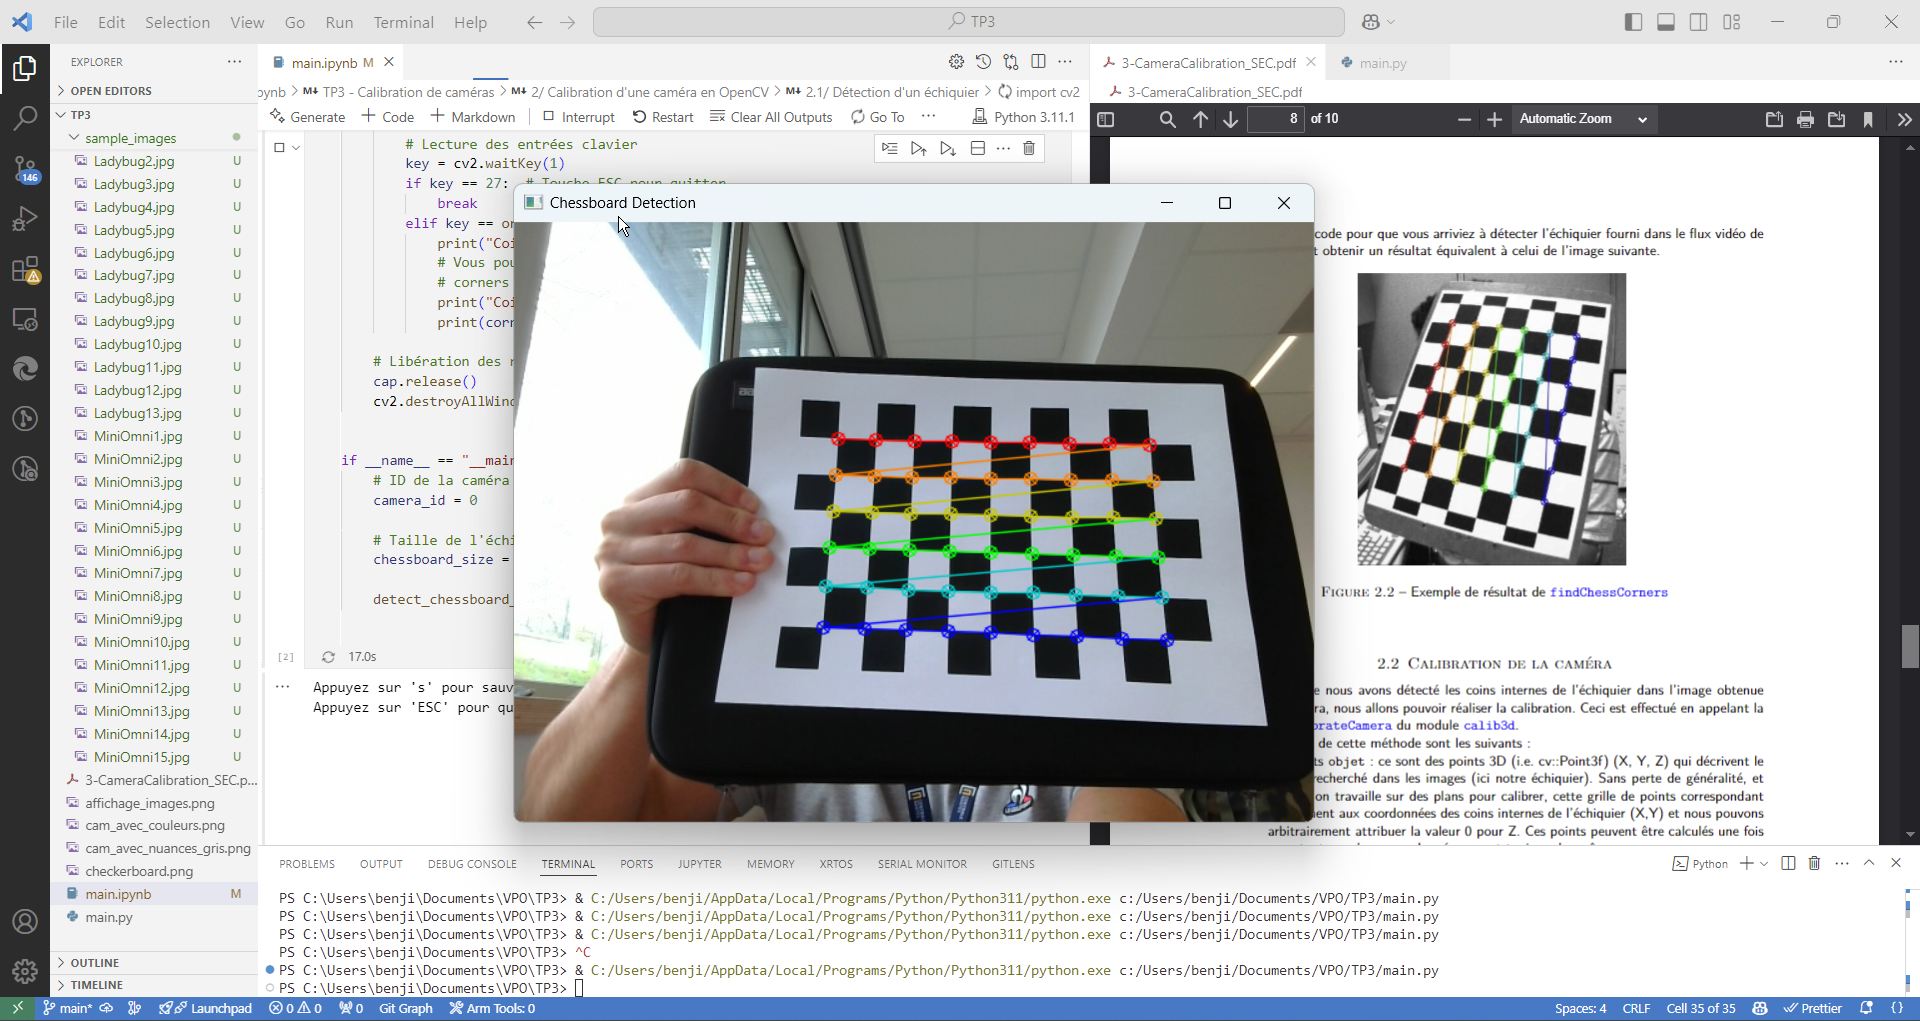

### 2.2/ Calibration de la caméra

Maintenant que nous avons détecté les coins internes de l’échiquier dans l’image obtenue
par notre caméra, nous allons pouvoir réaliser la calibration. Ceci est effectué en appelant la méthode `calibrateCamera` du module `calib3d`.

Les paramètres de cette méthode sont les suivants :
- les points objet : ce sont des points 3D (i.e. cv::Point3f) (X, Y, Z) qui décrivent le
patron recherché dans les images (ici notre échiquier). Sans perte de généralité, et
comme on travaille sur des plans pour calibrer, cette grille de points correspondant
simplement aux coordonnées des coins internes de l’échiquier (X,Y) et nous pouvons
arbitrairement attribuer la valeur 0 pour Z. Ces points peuvent être calculés une fois
pour toute car leurs coordonnées seront toujours les mêmes ;
- les points image : un ensemble de points 2D (i.e. `cv::Point2f`) correspondant
aux coins détectés dans l’image donc détectés avec `findChessboardCorners` (et
potentiellement raffinés par un appel à `cornerSubPix`) ;
- la taille de l’image utilisée pour la détection de l’échiquier ;
- la matrice de caméra (`cv::Mat`) : correspondant à la matrice intrinsèque de la caméra
qui est calculée par cette fonction ;
- les coefficients de distorsion (`cv::Mat`) de 4, 5 ou 8 éléments : calculés par la fonction ;
- un ensemble de matrices (`vector<cv::Mat>`) représentant les rotations estimées
pour chaque vue du pattern (i.e. de l’échiquier) ;
- un ensemble de matrices (`vector<cv::Mat>`) représentant les translations estimées
pour chaque vue du pattern (i.e. de l’échiquier).

Allez lire la documentation de la méthode !

Voici un exemple de déclarations de variables permettant l’appel de la méthode `calibrateCamera` pour une image et en supposant que vous avez bien remplis les vecteurs `object_points` et `image_points` :

```
// Enough images to calibrate
cv::Mat intrinsic = cv::Mat(3, 3, CV_32FC1);
cv::Mat distCoeffs;
vector<cv::Mat> rvecs;
vector<cv::Mat> tvecs;
vector<vector<cv::Point3f» object_points;
vector<vector<cv::Point2f» image_points;
intrinsic.ptr<float>(0)[0] = 1;
intrinsic.ptr<float>(1)[1] = 1;
calibrateCamera(object_points, image_points, image.size(), intrinsic,
distCoeffs, rvecs, tvecs);
```

<u>Remarque :</u> Notez que `object_points` et `image_points` contiennent respectivement les
coordonnées des coins physiques (`vector<cv::Point3f>`) de l’échiquier et l’équivalent des coordonnées 2D de ces coins dans une image (`vector<cv::Point2f>`). Ainsi, si vous voulez utiliser plusieurs images pour pouvoir obtenir une meilleure calibration, nous allons stocker ces correspondances pour chacune des images que vous allez utiliser dans la calibration (d’où le vecteur de vecteur).

Modifiez votre code pour pouvoir réaliser la calibration de votre caméra et ainsi récupérer les matrices intrinsèques (intrinsic ) et les coefficients de distorsion (distCoeffs ) de la caméra.

In [14]:
def collect_calibration_images(camera_id, board_size, num_images):
    """
    Collecte les images nécessaires à la calibration d'une caméra.
    :param camera_id: ID de la caméra.
    :param board_size: Taille de l'échiquier (cols, rows).
    :param num_images: Nombre d'images à collecter.
    :return: Liste des points objets et des points image détectés.
    """
    # Initialisation de la capture vidéo
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print("Erreur : Impossible d'accéder à la caméra.")
        return None, None

    # Préparation des points objets
    objp = np.zeros((board_size[0] * board_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:board_size[0], 0:board_size[1]].T.reshape(-1, 2)

    objpoints = []  # Points objets (3D)
    imgpoints = []  # Points image (2D)

    # Nom de la fenêtre
    window_name = "Calibration - Press 's' to save, 'ESC' to finish"
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)

    print(f"Capture des images pour la calibration. Appuyez sur 's' pour capturer une image ({num_images} nécessaires).")

    collected = 0
    while collected < num_images:
        ret, frame = cap.read()
        if not ret:
            print("Erreur : Impossible de lire le flux vidéo.")
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Détection des coins de l'échiquier
        found, corners = cv2.findChessboardCorners(
            gray_frame, board_size,
            cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_FAST_CHECK | cv2.CALIB_CB_NORMALIZE_IMAGE
        )

        # Si les coins sont détectés
        if found:
            cv2.drawChessboardCorners(frame, board_size, corners, found)

        # Affichage du flux vidéo
        cv2.imshow(window_name, frame)

        # Lecture des entrées clavier
        key = cv2.waitKey(1)
        if key == ESC_KEY:  # Touche ESC pour quitter
            print("Opération annulée.")
            break
        elif key == ord('s') and found:  # Touche 's' pour sauvegarder les coins détectés
            print(f"Image {collected + 1}/{num_images} capturée.")
            objpoints.append(objp)
            imgpoints.append(corners)
            collected += 1

    # Libération des ressources
    cap.release()
    cv2.destroyAllWindows()

    return objpoints, imgpoints


def calibrate_camera(objpoints, imgpoints, image_size):
    """
    Calibre la caméra à l'aide des points objets et image collectés.
    :param objpoints: Liste des points objets (3D).
    :param imgpoints: Liste des points image (2D).
    :param image_size: Taille des images utilisées.
    :return: Matrices de calibration et coefficients de distorsion.
    """
    print("Calibration en cours...")
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    if ret:
        print("Calibration réussie.")
        print("Matrice intrinsèque :\n", mtx)
        print("Coefficients de distorsion :\n", dist)
        return mtx, dist
    else:
        print("Erreur lors de la calibration.")
        return None, None


if __name__ == "__main__":
    # ID de la caméra
    camera_id = 0

    # Taille de l'échiquier (nombre de coins intérieurs en largeur et hauteur)
    chessboard_size = (9, 6)

    # Nombre d'images nécessaires pour la calibration
    num_images_to_capture = 10

    # Étape 1 : Collecte des images pour la calibration
    obj_points, img_points = collect_calibration_images(camera_id, chessboard_size, num_images_to_capture)

    if obj_points and img_points:
        # Taille de l'image utilisée pour la calibration
        cap = cv2.VideoCapture(camera_id)
        _, sample_frame = cap.read()
        cap.release()
        image_size = sample_frame.shape[1::-1]  # (width, height)

        # Étape 2 : Calibration de la caméra
        intrinsic_matrix, distortion_coeffs = calibrate_camera(obj_points, img_points, image_size)


Capture des images pour la calibration. Appuyez sur 's' pour capturer une image (10 nécessaires).
Image 1/10 capturée.
Image 2/10 capturée.
Image 3/10 capturée.
Image 4/10 capturée.
Image 5/10 capturée.
Image 6/10 capturée.
Image 7/10 capturée.
Image 8/10 capturée.
Image 9/10 capturée.
Image 10/10 capturée.
Calibration en cours...
Calibration réussie.
Matrice intrinsèque :
 [[512.7558407    0.         332.13690447]
 [  0.         510.11206793 288.43860695]
 [  0.           0.           1.        ]]
Coefficients de distorsion :
 [[ 0.08532712 -0.07707082  0.03724729  0.01661631 -0.3877137 ]]


**Résultats obtenus :**

- **Premier essai :**

Matrice intrinsèque :
 [[582.28479568   0.         321.95894667]
 [  0.         529.5478349  297.65856367]
 [  0.           0.           1.        ]]
 
Coefficients de distorsion :
 [[-0.05464969  2.0132607   0.06014899 -0.01993373 -4.47891784]]
 
- **Deuxième essai:**

Matrice intrinsèque :
 [[515.58256941   0.         356.20734477]
 [  0.         507.06294511 269.45845167]
 [  0.           0.           1.        ]]

Coefficients de distorsion :
 [[ 0.16735452 -0.1764297   0.00922014  0.0400452   0.10633868]]

- **Troisième essai:**

Matrice intrinsèque :
 [[503.16159253   0.         313.56565491]
 [  0.         503.35719093 242.4202603 ]
 [  0.           0.           1.        ]]
 
Coefficients de distorsion :
 [[ 0.2158577  -0.63386606 -0.00969722  0.00878723  0.76030813]]

- **Quatrième essai:**

Matrice intrinsèque :
 [[512.7558407    0.         332.13690447]
 [  0.         510.11206793 288.43860695]
 [  0.           0.           1.        ]]
 
Coefficients de distorsion :
 [[ 0.08532712 -0.07707082  0.03724729  0.01661631 -0.3877137 ]]

### 2.3/ Redressement de l'image

Comme nous venons de calculer la matrice intrinsèque et les coefficients de distorsion de
notre caméra, nous sommes maintenant capables de redresser une image. Pour ce faire, nous
allons utiliser la méthode `undistort` du module `calib3d`.

Cette méthode prend en paramètres :
- l’image à redresser ;
- l’image redressée résultat ;
- la matrice intrinsèque de la caméra ;
- les coefficients de distorsion.

Déclarez une nouvelle matrice (imageUndistorted) pour stocker l’image redressée, puis
faites appel à cette méthode :

```
undistort(image, imageUndistorted, intrinsic, distCoeffs);
```

Modifiez votre code pour afficher l’image redressée.

In [15]:
def undistort_image(image, intrinsic_matrix, distortion_coeffs):
    """
    Redresse une image en utilisant les paramètres de calibration.
    :param image: Image d'entrée à redresser.
    :param intrinsic_matrix: Matrice intrinsèque de la caméra.
    :param distortion_coeffs: Coefficients de distorsion de la caméra.
    :return: Image redressée.
    """
    h, w = image.shape[:2]

    # Calculer une nouvelle matrice intrinsèque optimale
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(intrinsic_matrix, distortion_coeffs, (w, h), 1, (w, h))

    # Redressement de l'image
    undistorted_image = cv2.undistort(image, intrinsic_matrix, distortion_coeffs, None, new_camera_matrix)

    return undistorted_image

if __name__ == "__main__":
    # Charger une image d'exemple
    image_path = "redressement_facial.jpg" 
    original_image = cv2.imread(image_path)

    if original_image is None:
        print("Erreur : Impossible de charger l'image.")
    else:
        # Matrice intrinsèque obtenue après calibration
        # [[503.16159253   0.         313.56565491]
        # [  0.         503.35719093 242.4202603 ]
        # [  0.           0.           1.        ]]
        intrinsic_matrix = np.array([[512.7558407,    0.,         332.13690447],
                                      [0.,         510.11206793, 288.43860695],
                                      [0, 0, 1]])

        # Coefficients de distorsion obtenus après calibration
        # [ 0.2158577  -0.63386606 -0.00969722  0.00878723  0.76030813]
        distortion_coeffs = np.array([ 0.2158577,  -0.63386606, -0.00969722,  0.00878723,  0.76030813])

        # Redressement de l'image
        undistorted_image = undistort_image(original_image, intrinsic_matrix, distortion_coeffs)

        # Afficher l'image originale et l'image redressée
        cv2.imshow("Image Originale", original_image)
        cv2.imshow("Image Redressée", undistorted_image)

        # Sauvegarder l'image redressée (optionnel)
        cv2.imwrite("undistorted_image.jpg", undistorted_image)

        # Attendre une touche pour fermer
        cv2.waitKey(0)
        cv2.destroyAllWindows()


**Résultats du redressement :**

![redressement_facial.jpg](redressement_facial.jpg)

![undistorted_image.jpg](undistorted_image.jpg)

On voit alors que les éléments centraux ont été redressés mais nous avons du mal à la calibration de la caméra de notre ordinateur (qui doit sûrement être déjà préconfigurée).

In [ ]:
import cv2
import numpy as np

# Constantes
ESC_KEY = 27  # Code ASCII pour la touche ESC
SPC_KEY = 32  # Code ASCII pour la touche ESPACE

def collect_calibration_images(camera_id, board_size, num_images):
    """
    Collecte des images pour la calibration à partir d'une caméra.
    :param camera_id: ID de la caméra.
    :param board_size: Taille de l'échiquier (cols, rows).
    :param num_images: Nombre d'images à collecter.
    :return: Points objets, points images, et taille des images.
    """
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print("Erreur : Impossible d'accéder à la caméra.")
        return None, None, None

    objp = np.zeros((board_size[0] * board_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:board_size[0], 0:board_size[1]].T.reshape(-1, 2)

    objpoints = []  # Points objets
    imgpoints = []  # Points image

    print(f"Appuyez sur 's' pour capturer une image ({num_images} nécessaires). Appuyez sur 'ESC' pour quitter.")

    collected = 0
    while collected < num_images:
        ret, frame = cap.read()
        if not ret:
            print("Erreur : Impossible de lire le flux vidéo.")
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        found, corners = cv2.findChessboardCorners(
            gray_frame, board_size, cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_NORMALIZE_IMAGE
        )

        if found:
            cv2.drawChessboardCorners(frame, board_size, corners, found)

        cv2.imshow("Calibration, appuyer sur la touche 's' pour capturer une calibration", frame)
        key = cv2.waitKey(1)

        if key == 27:  # Touche ESC pour quitter
            print("Opération annulée.")
            break
        elif key == ord('s') and found:  # Touche 's' pour sauvegarder
            objpoints.append(objp)
            corners_refined = cv2.cornerSubPix(
                gray_frame, corners, (11, 11), (-1, -1),
                (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
            )
            imgpoints.append(corners_refined)
            collected += 1
            print(f"Image {collected}/{num_images} capturée.")

    cap.release()
    cv2.destroyAllWindows()
    if collected > 0:
        return objpoints, imgpoints, gray_frame.shape[::-1]
    return None, None, None


def calibrate_camera(objpoints, imgpoints, image_size):
    """
    Effectue la calibration de la caméra.
    :param objpoints: Points objets.
    :param imgpoints: Points image.
    :param image_size: Taille des images utilisées.
    :return: Matrice intrinsèque, coefficients de distorsion.
    """
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    if ret:
        print("Calibration réussie.")
        print("Matrice intrinsèque :\n", mtx)
        print("Coefficients de distorsion :\n", dist)
        return mtx, dist
    else:
        print("Erreur lors de la calibration.")
        return None, None


def undistort_image(image, intrinsic_matrix, distortion_coeffs):
    """
    Redresse une image.
    :param image: Image d'entrée.
    :param intrinsic_matrix: Matrice intrinsèque.
    :param distortion_coeffs: Coefficients de distorsion.
    :return: Image redressée.
    """
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(intrinsic_matrix, distortion_coeffs, (w, h), 1, (w, h))
    undistorted_image = cv2.undistort(image, intrinsic_matrix, distortion_coeffs, None, new_camera_matrix)
    x, y, w, h = roi
    return undistorted_image[y:y+h, x:x+w]


def main():
    camera_id = int(input("Entrez l'identifiant de la caméra (par défaut 0) : ") or 0)
    board_cols = int(input("Entrez le nombre de coins internes en largeur (cols) : "))
    board_rows = int(input("Entrez le nombre de coins internes en hauteur (rows) : "))
    num_images = int(input("Entrez le nombre d'images à capturer pour la calibration : "))
    board_size = (board_cols, board_rows)

    # Étape 1 : Collecte des images
    objpoints, imgpoints, image_size = collect_calibration_images(camera_id, board_size, num_images)

    if objpoints is None or imgpoints is None:
        print("Aucune donnée collectée. Fin du programme.")
        return

    # Étape 2 : Calibration
    intrinsic_matrix, distortion_coeffs = calibrate_camera(objpoints, imgpoints, image_size)
    if intrinsic_matrix is None or distortion_coeffs is None:
        print("Calibration échouée. Fin du programme.")
        return

    # Étape 3 : Redressement d'image
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print("Erreur : Impossible d'accéder à la caméra.")
        return

    print("Appuyez sur 'r' pour voir l'image redressée ou 'ESC' pour quitter.")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Erreur : Impossible de lire le flux vidéo.")
            break

        cv2.imshow("Flux Original", frame)
        key = cv2.waitKey(1)

        if key == ESC_KEY:  # Touche ESC pour quitter
            break
        elif key == ord('r'):  # Touche 'r' pour afficher l'image redressée
            undistorted_frame = undistort_image(frame, intrinsic_matrix, distortion_coeffs)
            cv2.imshow("Image Redressée", undistorted_frame)

    cap.release()
    cv2.destroyAllWindows()

# Point d'entrée du programme
if __name__ == "__main__":
    main()


Appuyez sur 's' pour capturer une image (5 nécessaires). Appuyez sur 'ESC' pour quitter.
Image 1/5 capturée.
Image 2/5 capturée.
Image 3/5 capturée.
Image 4/5 capturée.
Image 5/5 capturée.
Calibration réussie.
Matrice intrinsèque :
 [[563.8341544    0.         311.29795071]
 [  0.         546.5056086  253.9842044 ]
 [  0.           0.           1.        ]]
Coefficients de distorsion :
 [[ 1.89902553e-01 -1.97480027e-01  4.02999378e-02  1.69586568e-03
  -1.87507782e+00]]
Appuyez sur 'r' pour voir l'image redressée ou 'ESC' pour quitter.


## 3/ Calibration d'une caméra en OpenCV à partir d'un ensemble d'images

In [7]:
import cv2
import numpy as np
import os

# Constantes
ESC_KEY = 27  # Code ASCII pour la touche ESC
SPC_KEY = 32  # Code ASCII pour la touche ESPACE

def collect_calibration_data_from_images(image_folder, board_size):
    """
    Collecte les points objets et image à partir d'un ensemble d'images contenant un échiquier.
    :param image_folder: Chemin vers le dossier contenant les images.
    :param board_size: Taille de l'échiquier (cols, rows).
    :return: Points objets, points images, et taille des images.
    """
    objp = np.zeros((board_size[0] * board_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:board_size[0], 0:board_size[1]].T.reshape(-1, 2)

    objpoints = []  # Points objets (3D)
    imgpoints = []  # Points image (2D)

    # Liste des fichiers d'images dans le dossier
    image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.JPG')])
    if not image_files:
        print(f"Aucune image trouvée dans le dossier : {image_folder}")
        return None, None, None

    for i, image_path in enumerate(image_files):
        image = cv2.imread(image_path)
        if image is None:
            print(f"Impossible de lire l'image : {image_path}")
            continue

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Détection des coins de l'échiquier
        found, corners = cv2.findChessboardCorners(
            gray_image, board_size, cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_NORMALIZE_IMAGE
        )

        if found:
            print(f"Échiquier détecté dans l'image : {image_path}")
            objpoints.append(objp)

            # Raffinement des coins
            corners_refined = cv2.cornerSubPix(
                gray_image, corners, (11, 11), (-1, -1),
                (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
            )
            imgpoints.append(corners_refined)

            # Affichage des coins détectés
            cv2.drawChessboardCorners(image, board_size, corners_refined, found)
            cv2.imshow("Echiquier detecte", image)
            cv2.waitKey(500)
        else:
            print(f"Aucun échiquier détecté dans l'image : {image_path}")

    cv2.destroyAllWindows()
    if objpoints and imgpoints:
        return objpoints, imgpoints, gray_image.shape[::-1]
    return None, None, None


def calibrate_camera(objpoints, imgpoints, image_size):
    """
    Calibre la caméra à l'aide des points objets et image collectés.
    :param objpoints: Liste des points objets (3D).
    :param imgpoints: Liste des points image (2D).
    :param image_size: Taille des images utilisées.
    :return: Matrice intrinsèque, coefficients de distorsion.
    """
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    if ret:
        print("Calibration réussie.")
        print("Matrice intrinsèque :\n", mtx)
        print("Coefficients de distorsion :\n", dist)
        return mtx, dist
    else:
        print("Erreur lors de la calibration.")
        return None, None


def undistort_image(image, intrinsic_matrix, distortion_coeffs):
    """
    Redresse une image en utilisant les paramètres de calibration.
    :param image: Image d'entrée.
    :param intrinsic_matrix: Matrice intrinsèque.
    :param distortion_coeffs: Coefficients de distorsion.
    :return: Image redressée.
    """
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(intrinsic_matrix, distortion_coeffs, (w, h), 1, (w, h))
    undistorted_image = cv2.undistort(image, intrinsic_matrix, distortion_coeffs, None, new_camera_matrix)
    x, y, w, h = roi
    return undistorted_image[y:y+h, x:x+w]


if __name__ == "__main__":
    # Chemin vers le dossier contenant les images
    image_folder = input("Entrez le chemin du dossier contenant les images : ") or "calib_gopro"

    # Taille de l'échiquier (nombre de coins intérieurs en largeur et hauteur)
    board_cols = int(input("Entrez le nombre de coins internes en largeur (cols) : ") or 9)
    board_rows = int(input("Entrez le nombre de coins internes en hauteur (rows) : ") or 6)
    board_size = (board_cols, board_rows)

    # Étape 1 : Collecte des points de calibration à partir des images
    objpoints, imgpoints, image_size = collect_calibration_data_from_images(image_folder, board_size)
    if objpoints is None or imgpoints is None:
        print("Aucune donnée de calibration collectée. Fin du programme.")
        exit()

    # Étape 2 : Calibration de la caméra
    intrinsic_matrix, distortion_coeffs = calibrate_camera(objpoints, imgpoints, image_size)
    if intrinsic_matrix is None or distortion_coeffs is None:
        print("Calibration échouée. Fin du programme.")
        exit()

    # Étape 3 : Redressement des images pour validation
    for image_file in sorted([f for f in os.listdir(image_folder) if f.endswith('.JPG')]):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is None:
            continue

        undistorted_image = undistort_image(image, intrinsic_matrix, distortion_coeffs)

        cv2.imshow("Image Originale", image)
        cv2.imshow("Image Redressee", undistorted_image)

        key = cv2.waitKey(0) # Attendre une touche pour passer à l'image suivante
        if key == ESC_KEY:  # ESC pour quitter
            break

    cv2.destroyAllWindows()

Échiquier détecté dans l'image : calib_gopro\GOPR8401.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8402.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8403.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8404.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8405.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8406.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8407.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8408.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8409.JPG
Aucun échiquier détecté dans l'image : calib_gopro\GOPR8410.JPG
Aucun échiquier détecté dans l'image : calib_gopro\GOPR8411.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8412.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8413.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8414.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8415.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8416.JPG
Échiquier détecté dans l'image : calib_gopro\GOPR8417.JPG
Éc